In [1]:
import pandas as pd

train_set = pd.read_csv('train.csv')

train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Dictionary

| Variable   | Definition                          | Key                                        |
|------------|------------------------------------|--------------------------------------------|
| survival   | Survival                            | 0 = No, 1 = Yes                            |
| pclass     | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd                  |
| sex        | Sex                                |                                            |
| Age        | Age in years                        |                                            |
| sibsp      | # of siblings / spouses aboard the Titanic |                                        |
| parch      | # of parents / children aboard the Titanic |                                    |
| ticket     | Ticket number                       |                                            |
| fare       | Passenger fare                      |                                            |
| cabin      | Cabin number                        |                                            |
| embarked   | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |
|            |                                    |                                            |

These are the variables and their definitions for the dataset you mentioned.
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

![convert notebook to web app](https://www.titanicstory.com/cutaway.gif)

![convert notebook to web app](https://i.pinimg.com/736x/68/6b/ee/686bee12fbeaa345afdeec6097eb993a.jpg)

![convert notebook to web app](https://www.simscale.com/wp-content/uploads/2017/12/titanicBreakupReconstruction.jpg)

In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train_set[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [4]:
import re

# Define a function to extract the title from the 'Name' column
def extract_title(name):
    title_match = re.search(r' ([A-Za-z]+)\.', name)
    if title_match:
        return title_match.group(1)
    return None

# Define a function to extract the surname from the 'Name' column
def extract_surname(name):
    parts = name.split(',')
    if len(parts) > 0:
        return parts[0]
    return None

# Add new 'Surname' and 'Title' columns
train_set['Surname'] = train_set['Name'].apply(extract_surname)
train_set['Title'] = train_set['Name'].apply(extract_title)

def combine_titles(dataset):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
combine_titles(train_set)

train_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Surname      891 non-null    object 
 13  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


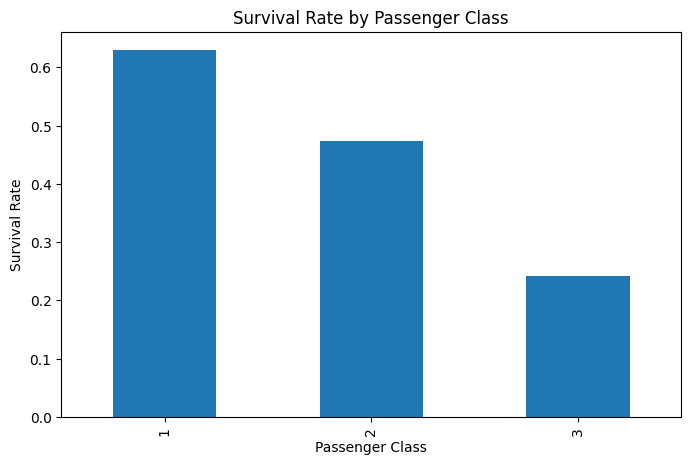

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
train_set.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [7]:
train_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


It could be explained by the location of cabins in each class. Typically, the higher-class cabins are located in the upper parts of the ship, while lower-class cabins are situated lower down.

We missed some age values. I can fill NaN by mean, median or do some reserch. I assume, that we will assign an age as an average for every title

In [8]:
train_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [9]:
av_age_Mr = round(train_set[train_set['Title']=='Mr']['Age'].mean())
av_age_Mrs = round(train_set[train_set['Title']=='Mrs']['Age'].mean())
av_age_Miss = round(train_set[train_set['Title']=='Miss']['Age'].mean())
av_age_Master = round(train_set[train_set['Title']=='Master']['Age'].mean())
av_age_Rare = round(train_set[train_set['Title']=='Rare']['Age'].mean())

In [10]:
print(f""" Average Age for: \n Mr {av_age_Mr} 
      \n Mrs {av_age_Mrs}
      \n Miss {av_age_Miss}
      \n Master {av_age_Master}
      \n Rare {av_age_Rare}""")

 Average Age for: 
 Mr 32 
      
 Mrs 36
      
 Miss 22
      
 Master 5
      
 Rare 46


In [11]:
def fill_age_based_on_title(passenger):
    title = passenger['Title']
    age = passenger['Age']

    if pd.isna(age):  # Check if age is missing
        if title == 'Mr':
            return av_age_Mr
        elif title == 'Mrs':
            return av_age_Mrs
        elif title == 'Miss':
            return av_age_Miss
        elif title == 'Master':
            return av_age_Master
        elif title == 'Rare':
            return av_age_Rare
    else:
        return age

train_set['Age'] = train_set.apply(fill_age_based_on_title, axis=1)

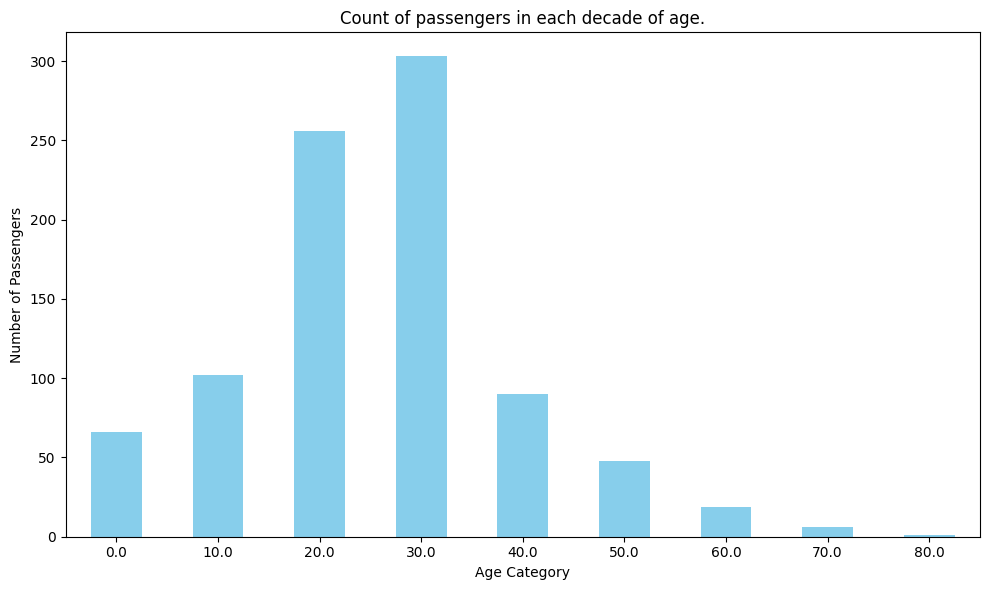

In [12]:
plt.figure(figsize=(10, 6))
train_set['Age'].apply(lambda age: (age // 10) * 10).value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of passengers in each decade of age.')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/Users/artemfadeev/Code/PycharmProjects/new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


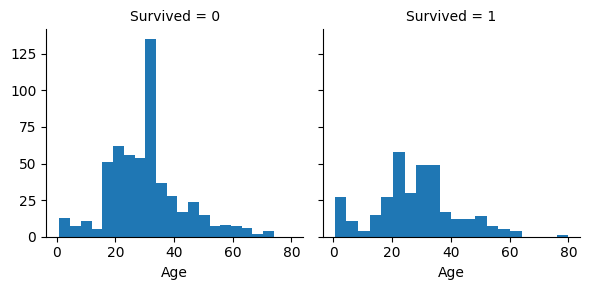

In [13]:
import seaborn as sns

g = sns.FacetGrid(train_set, col='Survived')
g.map(plt.hist, 'Age', bins=20)

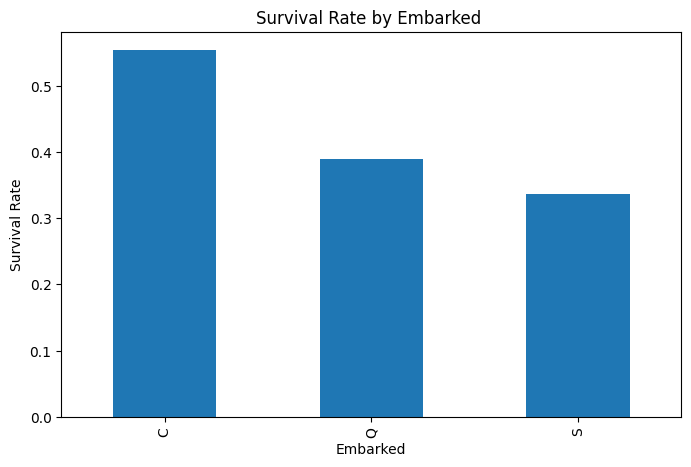

In [14]:
plt.figure(figsize=(8, 5))
train_set.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Embarked ')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/TitanicRoute.svg/2560px-TitanicRoute.svg.png)

Text(0.5, 0.98, '')

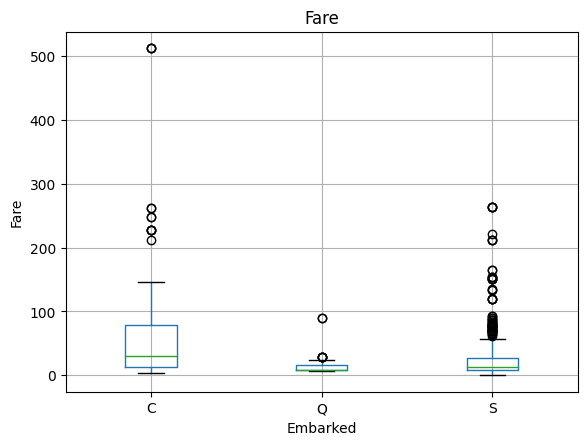

In [15]:
ax = train_set.boxplot(by='Embarked', column='Fare')
ax.set_xlabel('Embarked')
ax.set_ylabel('Fare')
plt.suptitle('')

In [16]:
embarkation_ports = ['C', 'Q', 'S']

for port in embarkation_ports:
    subset = train_set[train_set['Embarked'] == port]
    
    print(f"Count of classes for passengers from {port}")
    print(subset['Pclass'].value_counts())
    print((subset['Pclass'].value_counts(normalize=True) * 100).round(2))
    print()

Count of classes for passengers from C
1    85
3    66
2    17
Name: Pclass, dtype: int64
1    50.60
3    39.29
2    10.12
Name: Pclass, dtype: float64

Count of classes for passengers from Q
3    72
2     3
1     2
Name: Pclass, dtype: int64
3    93.51
2     3.90
1     2.60
Name: Pclass, dtype: float64

Count of classes for passengers from S
3    353
2    164
1    127
Name: Pclass, dtype: int64
3    54.81
2    25.47
1    19.72
Name: Pclass, dtype: float64



French are richer (at least on this board)

In [17]:
train_set['relatives'] = train_set['SibSp'] + train_set['Parch']

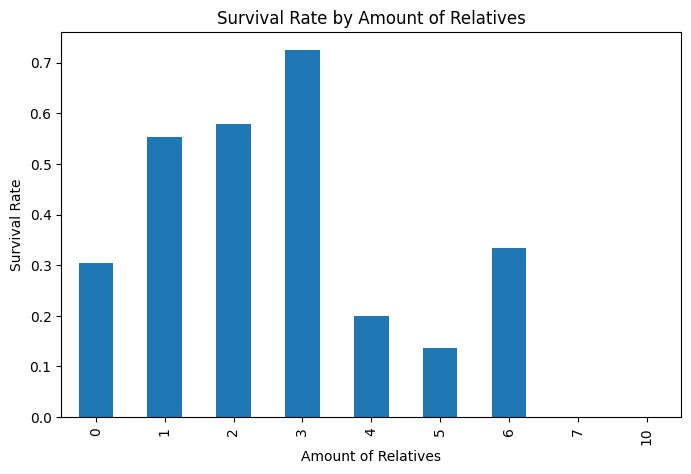

In [18]:
plt.figure(figsize=(8, 5))
train_set.groupby('relatives')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Amount of Relatives')
plt.xlabel('Amount of Relatives')
plt.ylabel('Survival Rate')
plt.show()

In [19]:
train_set[["relatives", 
           "Survived"]].groupby(['relatives'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,relatives,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [20]:
def encode_gender(dataset):
    dataset['gender_code'] = dataset['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    
encode_gender(train_set)

In [21]:
def encode_title(dataset):
    dataset['title_code'] = dataset['Title'].apply(lambda x: 1 if x in ['Mr', 'Mrs'] else 
                                                   (2 if x in ['Miss', 'Master'] else 0))
    
encode_title(train_set)

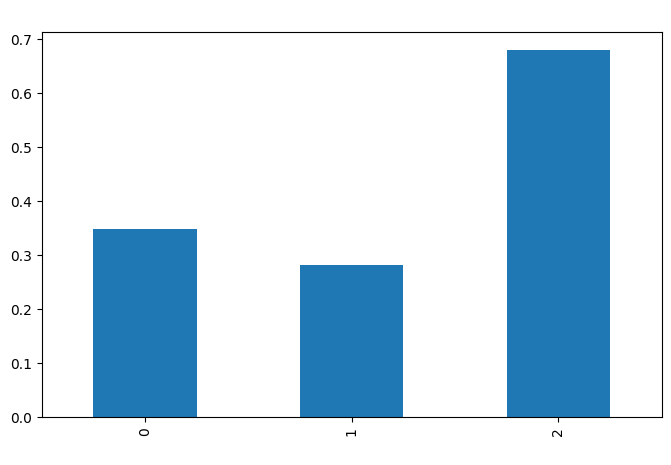

In [22]:
plt.figure(figsize=(8, 5))
train_set.groupby('title_code')['Survived'].mean().plot(kind='bar')
plt.title(' ')
plt.xlabel(' ')
plt.ylabel('')
plt.show()

In [23]:
train_set['FareBand'] = pd.qcut(train_set['Fare'], 4)
train_set[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [24]:
def encode_fare(dataset):
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
encode_fare(train_set)

In [25]:
def encode_embarked(dataset):
    dataset['Embarked'] = dataset['Embarked'].apply(lambda x: 1 if x=='C' else 
                                                   (2 if x=='Q' else 0))
    
encode_embarked(train_set)

In [26]:
train_set.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Surname', 'Title', 'FareBand'], axis=1, inplace=True)

In [27]:
train_set

,Survived,Pclass,Age,Fare,Embarked,relatives,gender_code,title_code
0,0,3,22.0,0,0,1,1,1
1,1,1,38.0,3,1,1,0,1
2,1,3,26.0,1,0,0,0,2
3,1,1,35.0,3,0,1,0,1
4,0,3,35.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,1,0,0,1,0
887,1,1,19.0,2,0,0,0,2
888,0,3,22.0,2,0,3,0,2
889,1,1,26.0,2,1,0,1,1


In [70]:
y = train_set['Survived']

X = train_set.drop('Survived', axis=1)

In [71]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
titanic_preds = forest_model.predict(val_X)

forest_model.score(train_X, train_y)
acc_random_forest = round(forest_model.score(train_X, train_y) * 100, 2)
acc_random_forest

82.53

In [75]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
Y_pred = decision_tree.predict(X)

acc_decision_tree = round(decision_tree.score(train_X, train_y) * 100, 2)
acc_decision_tree

95.81

In [76]:
test_set = pd.read_csv('test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test_set['Surname'] = test_set['Name'].apply(extract_surname)
test_set['Title'] = test_set['Name'].apply(extract_title)

test_set['relatives'] = test_set['SibSp'] + test_set['Parch']

test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

combine_titles(test_set)
test_set['Age'] = test_set.apply(fill_age_based_on_title, axis=1)
encode_gender(test_set)
encode_title(test_set)
encode_fare(test_set)
encode_embarked(test_set)

test_set.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Surname', 'Title'], axis=1, inplace=True)

In [78]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    int64  
 4   Embarked     418 non-null    int64  
 5   relatives    418 non-null    int64  
 6   gender_code  418 non-null    int64  
 7   title_code   418 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 26.3 KB


In [79]:
test_set.head()

,PassengerId,Pclass,Age,Fare,Embarked,relatives,gender_code,title_code
0,892,3,34.5,0,2,0,1,1
1,893,3,47.0,0,0,1,0,1
2,894,2,62.0,1,2,0,1,1
3,895,3,27.0,1,0,0,1,1
4,896,3,22.0,1,0,2,0,1


In [80]:
X = test_set.drop('PassengerId', axis=1)

titanic_preds = decision_tree.predict(X)

In [81]:
survived = (titanic_preds >= 0.5).astype(int).squeeze()
survived

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [82]:
result = pd.DataFrame({
    'PassengerId': test_set.PassengerId,
    'Survived': survived
})

file_path = 'submission.csv'

result.to_csv(file_path, index=False)